# WGCNA (Weighted gene co-expression network analysis) analysis
Weighted gene co-expression network analysis (WGCNA) is a systems biology approach to characterize gene association patterns between different samples and can be used to identify highly synergistic gene sets and identify candidate biomarker genes or therapeutic targets based on the endogeneity of the gene sets and the association between the gene sets and the phenotype.

Here, you will be briefly guided through the basics of how to use Pyomic to perform wgcna anlysis. Once you are set

In [ ]:
# update to the latest version, if not done yet.
!pip install Pyomic --upgrade --quiet

In [1]:
import Pyomic
%matplotlib inline
import scanpy as sc
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/fernandozeng/miniforge3/envs/django/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.0 pandas==1.4.3 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


We define the color palette to visualize the module of wgcna

In [2]:
from matplotlib.colors import LinearSegmentedColormap
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#5E4D9A', '#78C2ED','#866017', '#9F987F','#E0DFED',
 '#EF7B77', '#279AD7','#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10',
 '#EAEFC5', '#01A0A7', '#75C8CC', '#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812', '#9DC3C3', '#A89C92', '#FEE00C', '#FEF2A1']
c = LinearSegmentedColormap.from_list('Custom', sc_color, len(sc_color))

## Load the data
The analysis is based on the in-built WGCNA tutorial data.

In [3]:
import pandas as pd
data=pd.read_csv('sample/LiverFemale3600.csv')
data.dropna(inplace=True)
data.set_index(data.columns[0],inplace=True)
data.head()

F2_2    F2_3     F2_14    F2_15    F2_19     F2_20    F2_23  \
substanceBXH                                                                  
MMT00000044  -0.0181  0.0642  0.000064 -0.05800  0.04830 -0.151974 -0.00129   
MMT00000046  -0.0773 -0.0297  0.112000 -0.05890  0.04430 -0.093800  0.09340   
MMT00000051  -0.0226  0.0617 -0.129000  0.08710 -0.11500 -0.065026  0.00249   
MMT00000080  -0.0487  0.0582 -0.048300 -0.03710  0.02510  0.085043  0.04450   
MMT00000102   0.1760 -0.1890 -0.065000 -0.00846 -0.00574 -0.018072 -0.12500   

                F2_24   F2_26    F2_37  ...    F2_324  F2_325  F2_326  F2_327  \
substanceBXH                            ...                                     
MMT00000044  -0.23600 -0.0307 -0.02610  ...  0.047700 -0.0488  0.0168 -0.0309   
MMT00000046   0.02690 -0.1330  0.07570  ... -0.049200 -0.0350 -0.0738 -0.1730   
MMT00000051  -0.10200  0.1420 -0.10200  ...  0.000612  0.1210  0.0996  0.1090   
MMT00000080   0.00167 -0.0680  0.00567  ...  0.113000 -0.0859 -0.1340  0.0639   
MMT00000102  -0.06820  0.1250  0.00998  ... -0.080000 -0.1200  0.1230  0.1870   

               F2_328  F2_329  F2_330  F2_332  F2_355    F2_357  
substanceBXH                                                     
MMT00000044   0.02740 -0.0310  0.0660 -0.0199 -0.0146  0.065000  
MMT00000046  -0.07380 -0.2010 -0.0820 -0.0939  0.0192 -0.049900  
MMT00000051   0.02730  0.1200 -0.0629 -0.0395  0.1090  0.000253  
MMT00000080   0.00731  0.1240 -0.0212  0.0870  0.0512  0.024300  
MMT00000102   0.05410  0.0699  0.0708  0.1450 -0.0399  0.037500  

[5 rows x 135 columns]

## Correlation matrix calculate

...correlation coefficient matrix is being calculated
...direction correlation have been saved
...indirect correlation matrix is being calculated
...indirection correlation have been saved
...soft_threshold is being calculated
...appropriate soft_thresholds: 6


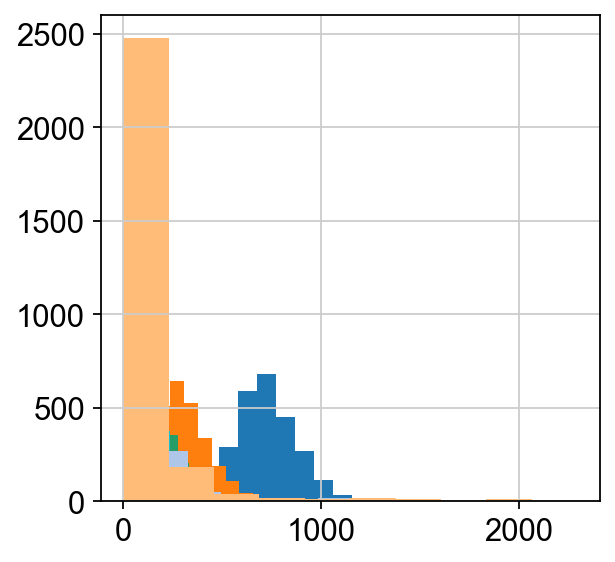

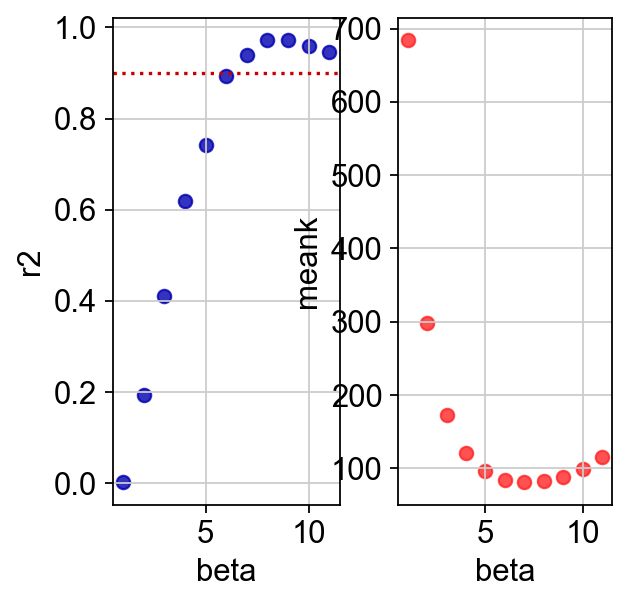

In [4]:
gene_wgcna=Pyomic.bulk.pywgcna(data,save_path='result')
gene_wgcna.calculate_correlation_direct()
gene_wgcna.calculate_correlation_indirect()
gene_wgcna.calculate_soft_threshold()
gene_wgcna.calculate_corr_matrix()

## Select the gene-module

...distance have being calculated
...geneTree have being calculated
...dynamicMods have being calculated
..cutHeight not given, setting it to 448.9691031625519  ===>  99% of the (truncated) height range in dendro.
..done.
...total: 12


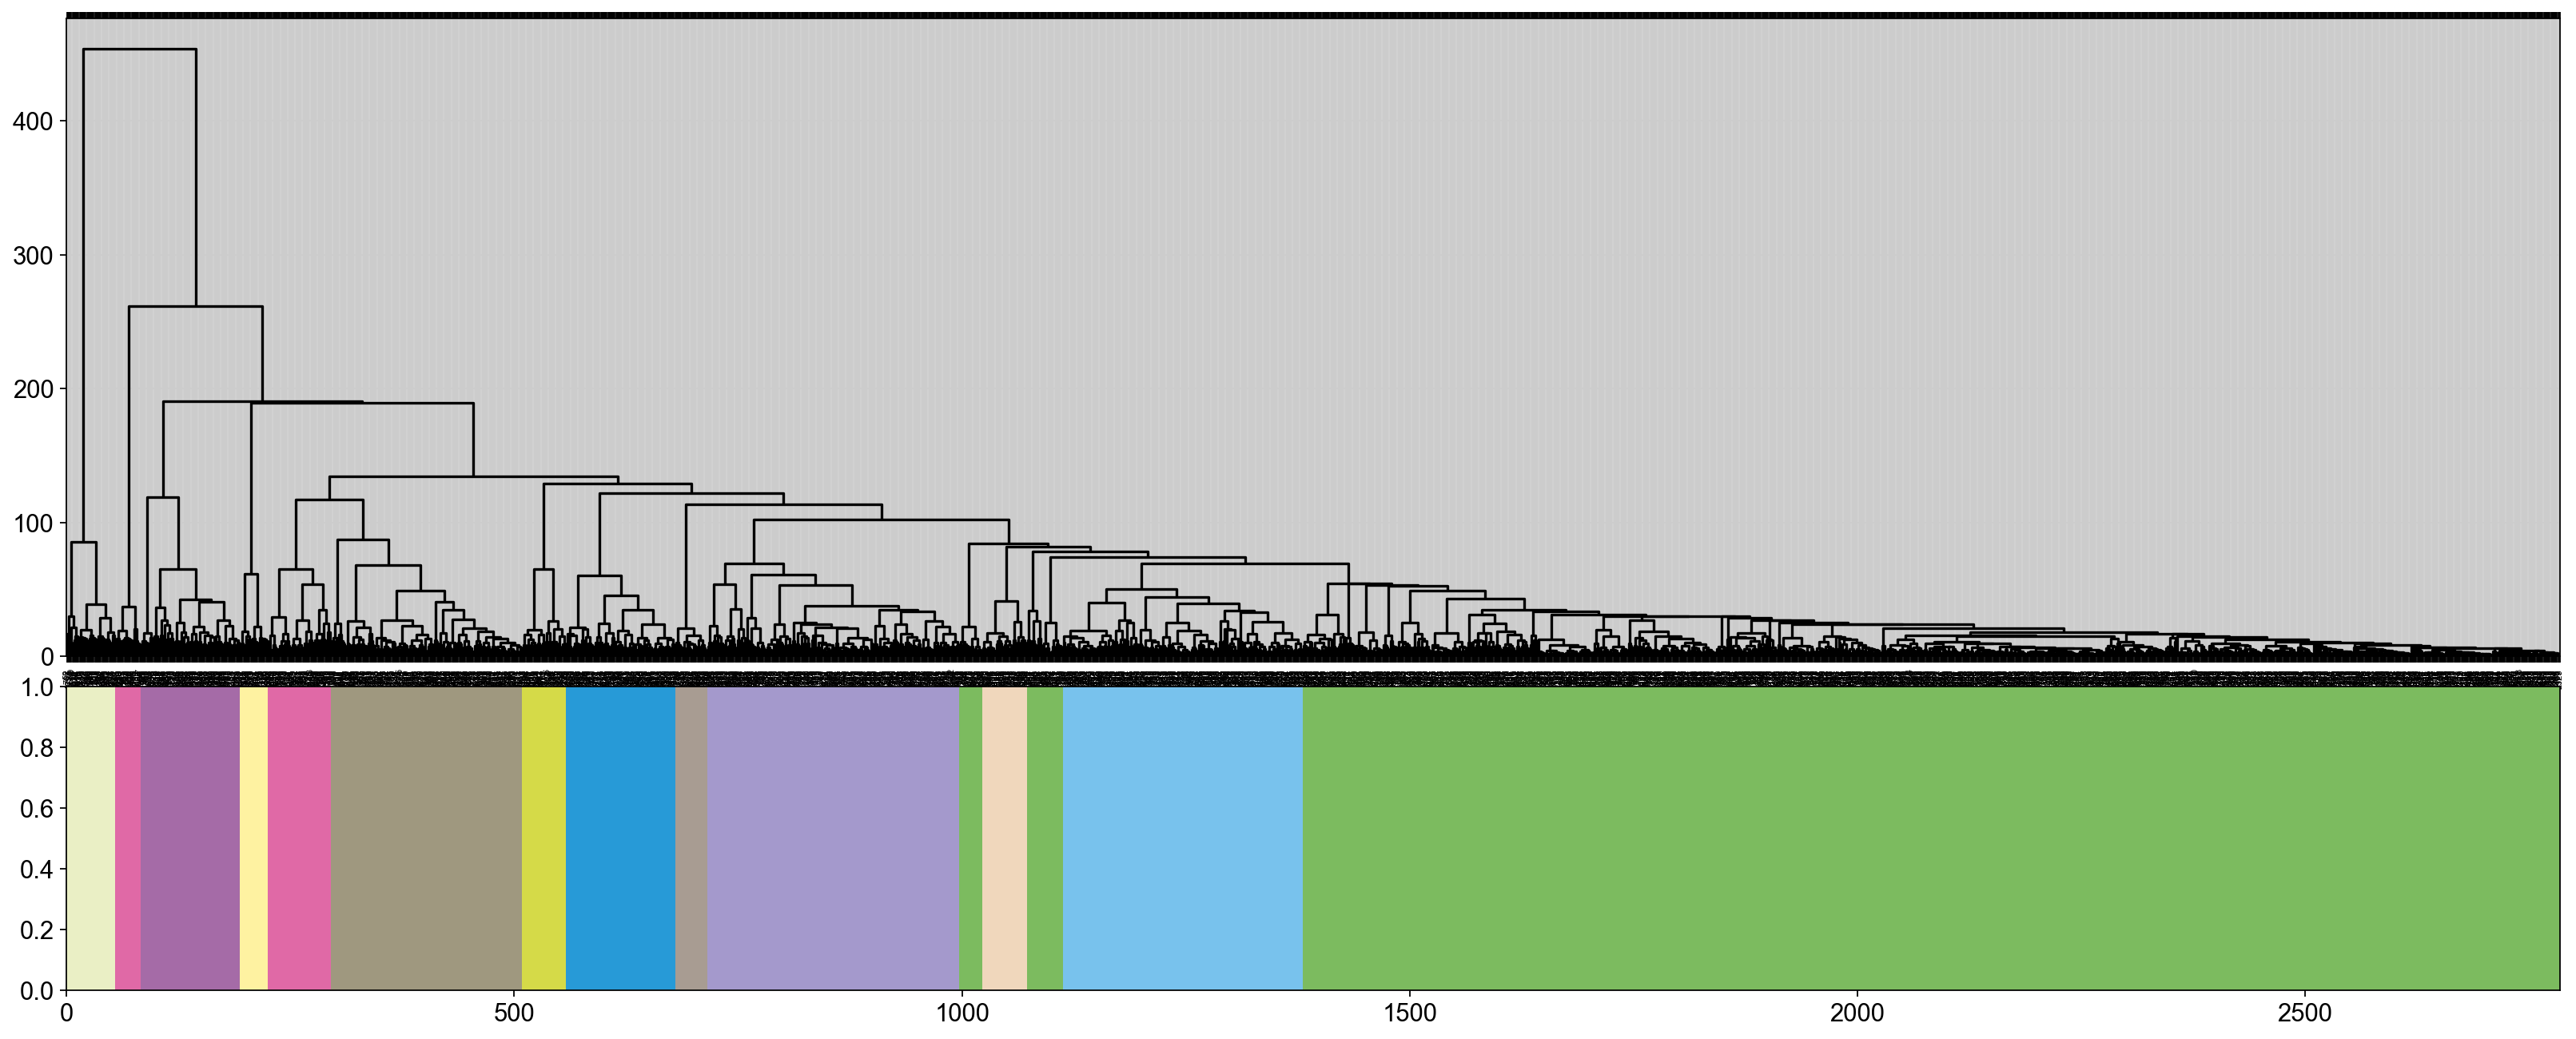

In [5]:
gene_wgcna.calculate_distance()
gene_wgcna.calculate_geneTree()
gene_wgcna.calculate_dynamicMods()
module=gene_wgcna.calculate_gene_module(cmap=c)

## Calculate the correlation with character

...PCA analysis have being done
...co-analysis have being done


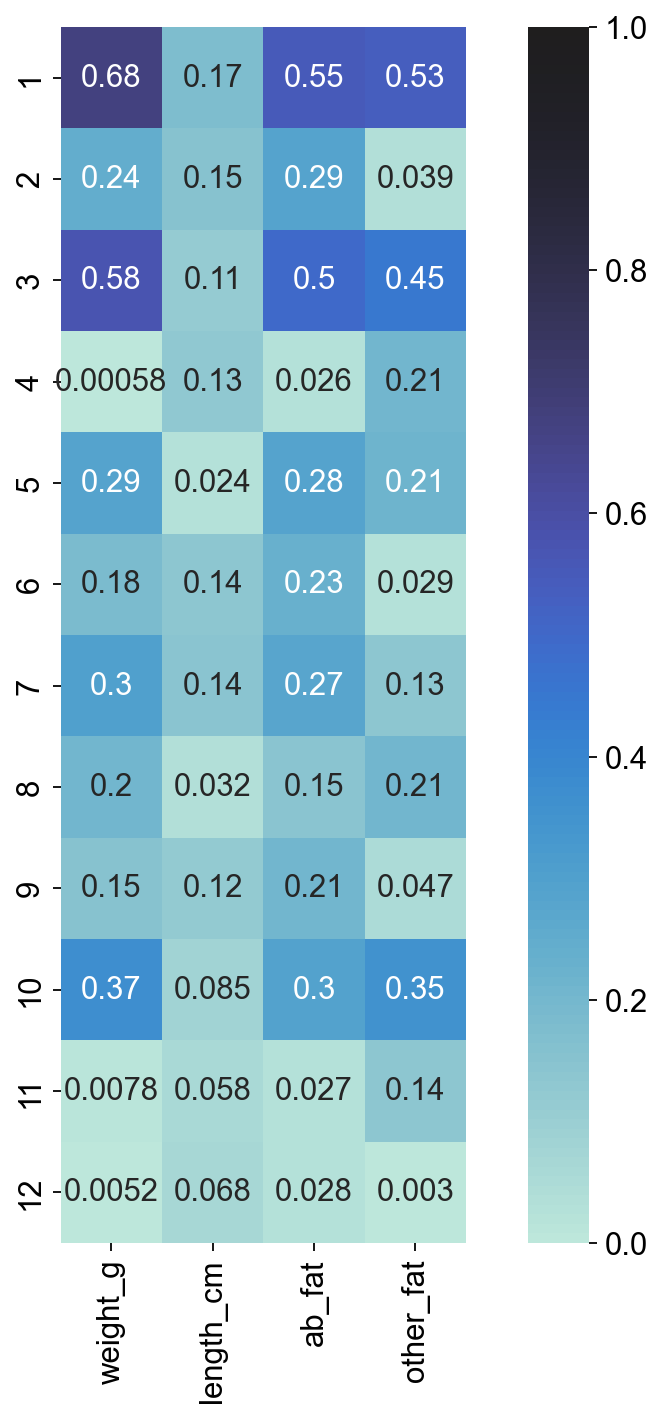

In [6]:
#Correlation analysis between gene modules and traits
cha=pd.read_csv('sample/character.csv')
cha.set_index(cha.columns[0],inplace=True)
comat=gene_wgcna.Analysis_cocharacter(cha)